In [1]:
# Add module
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


In [ ]:
# Load the dataset
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d grassknoted/asl-alphabet
! unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [2]:
# Importing 
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os 
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Make numpy value easier to read
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils 
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2,
                        min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist 
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger 
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger 
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger 
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the hand
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks,
                                          mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [4]:
# Function to create a CSV file or add dataset to an existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])

In [ ]:
# Extracting Feature for Training
# We use the ASL alphabet data set by Akash
paths = "/content/asl_alphabet_train/asl_alphabet_train"
csv_path = "/content/drive/MyDrive/CP2/ASL_dataset.csv"

if os.path.exists(csv_path):
  print("CSV file already exists, delete now!")
  os.remove(csv_path)
else:
  print("The CSV file does not exist", csv_path, "Going to create after Extraction")

for dirlist in os.listdir(paths):
  for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
    if dirlist in ["J", "Z", "del", "nothing", "space"]:
      continue
    else:
      print("Inside Folder", dirlist, "Consist:", len(filenames), "Imagset")
      for filename in filenames:
        if filename.endswith(".jpg") or filename.endswith(".JPG"):
          #print(os.path.join(root, filename), True)
          (wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ,
          annotated_image) = extract_feature(os.path.join(root, filename))
          
          if((not wristX == 0) and (not wristY == 0)):
            toCSV(csv_path, dirlist, 
                  wristX, wristY, wristZ,
                  thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                  thumb_McpX, thumb_McpY, thumb_McpZ,
                  thumb_IpX, thumb_IpY, thumb_IpZ,
                  thumb_TipX, thumb_TipY, thumb_TipZ,
                  index_McpX, index_McpY, index_McpZ,
                  index_PipX, index_PipY, index_PipZ,
                  index_DipX, index_DipY, index_DipZ,
                  index_TipX, index_TipY, index_TipZ,
                  middle_McpX, middle_McpY, middle_McpZ,
                  middle_PipX, middle_PipY, middle_PipZ,
                  middle_DipX, middle_DipY, middle_DipZ,
                  middle_TipX, middle_TipY, middle_TipZ,
                  ring_McpX, ring_McpY, ring_McpZ,
                  ring_PipX, ring_PipY, ring_PipZ,
                  ring_DipX, ring_DipY, ring_DipZ,
                  ring_TipX, ring_TipY, ring_TipZ,
                  pinky_McpX, pinky_McpY, pinky_McpZ,
                  pinky_PipX, pinky_PipY, pinky_PipZ,
                  pinky_DipX, pinky_DipY, pinky_DipZ,
                  pinky_TipX, pinky_TipY, pinky_TipZ,)
          else:
            print(os.path.join(root, filename), "Hand does not have hand landmark")
print("===================Feature Extraction for TRAINING is Completed===================")


Streaming output truncated to the last 5000 lines.
/content/asl_alphabet_train/asl_alphabet_train/N/N2675.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N3.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N1713.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N12.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N2852.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N2130.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N440.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N2042.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N1532.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alphabet_train/N/N1125.jpg Hand does not have hand landmark
/content/asl_alphabet_train/asl_alp

In [5]:
# Read CSV file for Training the model using Pandas
df = pd.read_csv("/content/drive/MyDrive/CP2/ASL_dataset.csv", header=0)
# Sort the values of the dataset according to the ALphabets
df = df.sort_values(by=["class_type"])
df

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
48127,A,64.812732,180.994701,-1.010612e-06,46.950552,174.564779,-0.014773,34.812775,156.706548,-0.021414,...,-0.042712,74.895227,141.527033,-0.072397,72.005469,153.424740,-0.060040,71.741724,163.825440,-0.041582
48793,A,83.588421,161.680603,-9.036500e-07,64.684415,150.422215,-0.032225,52.999431,126.352894,-0.049192,...,-0.061131,104.102671,116.438997,-0.097715,100.800765,130.624628,-0.078587,99.665433,141.682553,-0.051736
48792,A,152.304697,100.170362,-8.624166e-07,131.751573,91.662747,-0.031244,115.895057,73.715276,-0.045401,...,-0.038687,165.671623,54.736799,-0.076113,165.045929,68.606991,-0.060103,163.988352,77.289903,-0.037385
48791,A,112.549925,131.057024,-1.001976e-06,95.268404,113.714242,-0.028383,85.399908,92.771369,-0.045814,...,-0.034656,138.696873,86.635101,-0.072732,131.392503,97.676367,-0.059561,126.254952,107.966495,-0.037032
48790,A,117.669845,102.208269,-1.006996e-06,98.629200,90.085262,-0.024345,86.033994,68.297517,-0.038477,...,-0.050339,134.201360,57.177150,-0.087939,130.675852,71.585906,-0.072514,129.155421,83.802176,-0.048629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,Y,67.228603,97.336519,-7.469585e-07,47.630736,89.287096,-0.019205,32.877707,79.272956,-0.034912,...,-0.045248,88.380581,58.304107,-0.070904,90.978551,51.128042,-0.067254,92.988038,43.433028,-0.057416
1772,Y,78.499842,198.464167,-9.602792e-07,57.443750,190.722477,-0.053251,41.241470,173.879504,-0.081360,...,-0.060260,109.826195,148.668015,-0.104640,113.932228,139.558077,-0.112776,116.648793,129.276228,-0.110222
1771,Y,141.410112,197.701275,-1.031630e-06,122.744036,186.133242,-0.045512,110.879898,168.735135,-0.064905,...,-0.033029,168.628073,164.363265,-0.066862,164.258170,173.657584,-0.057238,159.058797,180.244255,-0.041243
1769,Y,53.684455,154.497790,-1.187427e-06,34.850591,137.461448,-0.035362,23.493764,114.873862,-0.057182,...,-0.043563,98.256600,100.757432,-0.077564,102.594006,90.279734,-0.076497,106.469929,78.847229,-0.064604


In [6]:
# Put Categorical using Pandas
df["class_type"] = pd.Categorical(df["class_type"])
df["class_type"] = df.class_type.cat.codes
df

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
48127,0,64.812732,180.994701,-1.010612e-06,46.950552,174.564779,-0.014773,34.812775,156.706548,-0.021414,...,-0.042712,74.895227,141.527033,-0.072397,72.005469,153.424740,-0.060040,71.741724,163.825440,-0.041582
48793,0,83.588421,161.680603,-9.036500e-07,64.684415,150.422215,-0.032225,52.999431,126.352894,-0.049192,...,-0.061131,104.102671,116.438997,-0.097715,100.800765,130.624628,-0.078587,99.665433,141.682553,-0.051736
48792,0,152.304697,100.170362,-8.624166e-07,131.751573,91.662747,-0.031244,115.895057,73.715276,-0.045401,...,-0.038687,165.671623,54.736799,-0.076113,165.045929,68.606991,-0.060103,163.988352,77.289903,-0.037385
48791,0,112.549925,131.057024,-1.001976e-06,95.268404,113.714242,-0.028383,85.399908,92.771369,-0.045814,...,-0.034656,138.696873,86.635101,-0.072732,131.392503,97.676367,-0.059561,126.254952,107.966495,-0.037032
48790,0,117.669845,102.208269,-1.006996e-06,98.629200,90.085262,-0.024345,86.033994,68.297517,-0.038477,...,-0.050339,134.201360,57.177150,-0.087939,130.675852,71.585906,-0.072514,129.155421,83.802176,-0.048629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,23,67.228603,97.336519,-7.469585e-07,47.630736,89.287096,-0.019205,32.877707,79.272956,-0.034912,...,-0.045248,88.380581,58.304107,-0.070904,90.978551,51.128042,-0.067254,92.988038,43.433028,-0.057416
1772,23,78.499842,198.464167,-9.602792e-07,57.443750,190.722477,-0.053251,41.241470,173.879504,-0.081360,...,-0.060260,109.826195,148.668015,-0.104640,113.932228,139.558077,-0.112776,116.648793,129.276228,-0.110222
1771,23,141.410112,197.701275,-1.031630e-06,122.744036,186.133242,-0.045512,110.879898,168.735135,-0.064905,...,-0.033029,168.628073,164.363265,-0.066862,164.258170,173.657584,-0.057238,159.058797,180.244255,-0.041243
1769,23,53.684455,154.497790,-1.187427e-06,34.850591,137.461448,-0.035362,23.493764,114.873862,-0.057182,...,-0.043563,98.256600,100.757432,-0.077564,102.594006,90.279734,-0.076497,106.469929,78.847229,-0.064604


In [7]:
# Copy Label and Feature for training
y = df.pop("class_type")
x = df.copy()

In [8]:
# Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.75,
                                                    random_state=0,
                                                    stratify=y)

In [9]:
# Copied Features then turn to Array by using Numpy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [10]:
# Check array shape before transformation
print("x_train before", x_train.shape)
print("x_test before", x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check array shape after transformation
print("x_train after:", x_train.shape)
print("x_test after: ", x_test.shape)

x_train before (45259, 63)
x_test before (15087, 63)
x_train after: (45259, 63, 1)
x_test after:  (15087, 63, 1)


In [11]:
# Check sample train and test feature
print(x_train[0])
print(x_test[7])

[[ 84.142]
 [179.09 ]
 [  0.   ]
 [ 55.889]
 [170.681]
 [ -0.064]
 [ 39.277]
 [142.09 ]
 [ -0.094]
 [ 59.527]
 [125.794]
 [ -0.124]
 [ 85.104]
 [124.017]
 [ -0.151]
 [ 48.226]
 [107.746]
 [ -0.081]
 [ 31.286]
 [ 72.323]
 [ -0.152]
 [ 21.051]
 [ 47.955]
 [ -0.204]
 [ 12.747]
 [ 27.492]
 [ -0.24 ]
 [ 71.476]
 [105.84 ]
 [ -0.095]
 [ 68.767]
 [ 65.665]
 [ -0.172]
 [ 68.128]
 [ 38.17 ]
 [ -0.225]
 [ 68.546]
 [ 14.984]
 [ -0.251]
 [ 92.337]
 [112.14 ]
 [ -0.112]
 [ 86.885]
 [ 94.711]
 [ -0.215]
 [ 80.498]
 [120.087]
 [ -0.22 ]
 [ 79.042]
 [140.166]
 [ -0.193]
 [111.229]
 [123.378]
 [ -0.135]
 [105.289]
 [115.453]
 [ -0.223]
 [ 96.835]
 [136.348]
 [ -0.214]
 [ 94.807]
 [152.891]
 [ -0.183]]
[[ 47.881]
 [141.821]
 [  0.   ]
 [ 55.969]
 [146.64 ]
 [ -0.088]
 [ 69.145]
 [154.003]
 [ -0.12 ]
 [ 80.98 ]
 [165.103]
 [ -0.134]
 [ 90.058]
 [174.005]
 [ -0.139]
 [ 85.377]
 [124.516]
 [ -0.072]
 [105.562]
 [136.761]
 [ -0.096]
 [115.406]
 [148.058]
 [ -0.112]
 [122.585]
 [156.92 ]
 [ -0.12 ]
 [ 87.201

In [12]:
# Number of classes according ASL alphabet (not included J and Z)
num_classes = 24

# Using the Keras.Utils to put the label categorically
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
from warnings import filters
# Build the Model
'''One Dimensional Convolutional Neural Network model, train will be feed
to 1-Dimension Convolusional Neural Network'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                           padding="causal", activation="relu",
                           input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')                   
    ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 64)            10304     
                                                                 
 conv1d_3 (Conv1D)           (None, 31, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 64)           0         
 1D)                                                    

In [14]:
# Train the Model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, shuffle=True,
          validation_data=(x_test, y_test))

Epoch 1/50
1415/1415 [==============================] - 21s 8ms/step - loss: 0.6374 - accuracy: 0.7929 - val_loss: 0.2236 - val_accuracy: 0.9286
Epoch 2/50
1415/1415 [==============================] - 13s 9ms/step - loss: 0.2347 - accuracy: 0.9265 - val_loss: 0.2013 - val_accuracy: 0.9345
Epoch 3/50
1415/1415 [==============================] - 11s 8ms/step - loss: 0.1923 - accuracy: 0.9402 - val_loss: 0.2101 - val_accuracy: 0.9351
Epoch 4/50
1415/1415 [==============================] - 12s 9ms/step - loss: 0.1587 - accuracy: 0.9511 - val_loss: 0.1660 - val_accuracy: 0.9510
Epoch 5/50
1415/1415 [==============================] - 11s 8ms/step - loss: 0.1420 - accuracy: 0.9557 - val_loss: 0.1453 - val_accuracy: 0.9549
Epoch 6/50
1415/1415 [==============================] - 11s 8ms/step - loss: 0.1287 - accuracy: 0.9605 - val_loss: 0.1463 - val_accuracy: 0.9613
Epoch 7/50
1415/1415 [==============================] - 11s 8ms/step - loss: 0.1182 - accuracy: 0.9634 - val_loss: 0.1358 - val_ac

In [15]:
# Saving the model into H5 system file
save_model = "/content/drive/MyDrive/CP2/model_ASL_shuffle.h5"
model.save(save_model)
print("Model has been saved in", save_model)

Model has been saved in /content/drive/MyDrive/CP2/model_ASL_shuffle.h5


In [16]:
# Evaluating model
model.evaluate(x_test, y_test, verbose=0)

[0.15246258676052094, 0.9758070111274719]

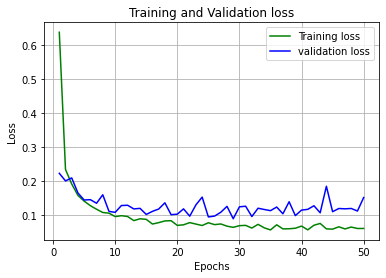

In [18]:
# Plotting Training - Validation Loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Encoding the prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'K': 9,
    'L': 10,
    'M': 11,
    'N': 12,
    'O': 13,
    'P': 14,
    'Q': 15,
    'R': 16,
    'S': 17,
    'T': 18,
    'U': 19,
    'V': 20,
    'W': 21,
    'X': 22,
    'Y': 23
}

In [20]:
from google.colab import files
files.upload()

Saving A (4).jpg to A (4).jpg


{'A (4).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x07\xd0\x07\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\

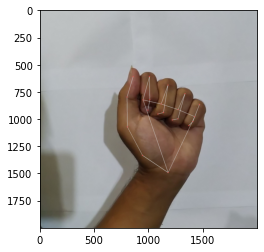

In [21]:
# Directly from Image Dataset Testing
# Load Image and do Feature Extraction
path_to_image = "/content/A (4).jpg"

(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image)

plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [22]:
# Shape the image features into an 1x3 array
input_img = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_img.shape)
print(input_img)

(1, 63, 1)
[[[1175.115]
  [1491.736]
  [  -0.   ]
  [ 940.897]
  [1333.628]
  [  -0.063]
  [ 801.21 ]
  [1072.085]
  [  -0.087]
  [ 798.162]
  [ 798.993]
  [  -0.112]
  [ 854.129]
  [ 611.668]
  [  -0.122]
  [ 945.842]
  [ 824.122]
  [   0.013]
  [1004.581]
  [ 610.751]
  [  -0.075]
  [1007.78 ]
  [ 823.666]
  [  -0.119]
  [ 989.441]
  [ 918.801]
  [  -0.132]
  [1111.109]
  [ 862.207]
  [   0.016]
  [1174.735]
  [ 688.565]
  [  -0.069]
  [1132.834]
  [ 940.092]
  [  -0.087]
  [1081.372]
  [ 954.261]
  [  -0.079]
  [1266.456]
  [ 913.35 ]
  [  -0.002]
  [1330.724]
  [ 767.522]
  [  -0.088]
  [1265.061]
  [ 998.686]
  [  -0.068]
  [1213.964]
  [1008.491]
  [  -0.032]
  [1419.845]
  [ 978.597]
  [  -0.025]
  [1463.41 ]
  [ 865.347]
  [  -0.067]
  [1403.   ]
  [1024.   ]
  [  -0.043]
  [1365.03 ]
  [1059.749]
  [  -0.014]]]


In [23]:
# Print the prediction
predict = model.predict(input_img) 
predict_classes = np.argmax(predict, axis=1)
#print(predict)
#print(predict_classes)

# Print prediction with defined classes
for alphabet, value in classes.items():
  if value == predict_classes[0]:
    print("The possible letter:", alphabet)

1/1 [==============================] - 0s 297ms/step
The possible letter: A
